<a href="https://colab.research.google.com/github/khaled5321/stable_diffusion_example/blob/main/Stable_diffusion_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install dependances

In [ ]:
!pip install diffusers
!pip install transformers
!pip install accelerate # optional for less memory usage

Download stable diffusion from hugging face hub and run it   

In [ ]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
import transformers

model_id = "stabilityai/stable-diffusion-2-1"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16) # Load the model
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config) #use DPM scheduler for faster image generation
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars high quality 4k" # Text you want to turn into image
image = pipe(prompt).images[0] # Generating the image
    
image.save("astronaut_rides_horse.png")

Downloading:   0%|          | 0.00/539 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/633 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/939 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Display Image

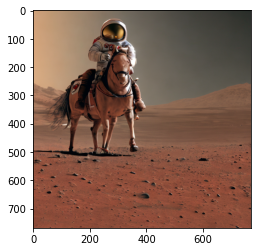

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(image)
plt.show()